# ETF Project

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats.stats as sss
from scipy import stats
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
%matplotlib inline

## 1. Load data and factors

In [2]:
data = pd.read_csv("etfs_day.csv", index_col=0, parse_dates=True)
data = (data - data.iloc[0, :])/data.iloc[0, :]
factors = pd.read_csv("factors_day.csv", index_col=0, parse_dates=True)
df = pd.merge(data,factors,left_index=True,right_index=True)

df.head()

,AAXJ,ACWI,ACWX,BND,DVY,EMB,EUFN,IBB,IEF,IEI,...,VONE,VONG,VONV,VTWO,VXUS,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.42,-0.71,0.26,-0.14,-0.07
2011-09-01,-0.007301,-0.006868,-0.005504,0.004243,-0.009812,0.001228,-0.017524,-0.015175,0.007969,0.003418,...,-0.011087,-0.006201,-0.008585,-0.014871,-0.006501,-1.33,-1.11,-0.76,0.56,-0.18
2011-09-02,-0.025819,-0.030449,-0.029022,0.007009,-0.030612,0.004660,-0.046919,-0.034924,0.017213,0.004822,...,-0.034156,-0.032897,-0.037701,-0.053884,-0.031419,-2.64,-0.86,-0.67,0.57,-0.07
2011-09-06,-0.024038,-0.047390,-0.055792,0.008452,-0.038461,0.000957,-0.112493,-0.020996,0.018575,0.004079,...,-0.043991,-0.043059,-0.060657,-0.056333,-0.058938,-0.71,0.39,-0.64,0.24,-0.16
2011-09-07,-0.000356,-0.020376,-0.026770,0.006167,-0.016484,0.004660,-0.082533,0.007691,0.013127,0.003501,...,-0.018777,-0.014296,-0.019970,-0.018370,-0.027519,3.06,0.94,0.92,-1.17,0.11


## 2. FF5 model

In [3]:
import statsmodels.api as sm
FF5=pd.DataFrame([],index=df.drop(['Mkt-RF','SMB','HML', 'RMW', 'CMA'],axis=1).columns,\
                 columns=['avg','alpha','talpha','betamkt','tbetamkt','betasmb','tbetasmb','betahml','tbetahml',\
                          'betarmw','tbetarmw','betacma','tbetacma']) 

FF5Resid = df.drop(['Mkt-RF','SMB','HML','RMW','CMA'],axis=1).copy()

FF5['avg'] = df.drop(['Mkt-RF','SMB','HML','RMW','CMA'],axis=1).mean()

for portfolio in FF5.index:
    y = df[portfolio]
    x = df[['Mkt-RF','SMB','HML','RMW','CMA']]
    x = sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    FF5.at[portfolio,['alpha','betamkt','betahml','betasmb','betarmw','betacma']]=results.params.values
    FF5.at[portfolio,['talpha','tbetamkt','tbetahml','tbetasmb','tbetarmw','tbetacma']]=(results.params/results.HC0_se).values
    FF5Resid[portfolio]=results.resid
    
FF5=FF5.astype('float')  
FF5

,avg,alpha,talpha,betamkt,tbetamkt,betasmb,tbetasmb,betahml,tbetahml,betarmw,tbetarmw,betacma,tbetacma
AAXJ,0.095573,0.095437,33.984535,0.002441,0.604827,0.005370,0.629445,-0.005511,-0.845418,-0.007805,-0.778838,-0.038510,-2.815980
ACWI,0.345029,0.345101,65.254170,-0.001037,-0.143560,0.015807,1.032227,-0.002765,-0.231640,0.006709,0.357222,-0.075859,-3.001360
ACWX,0.143028,0.142910,49.231245,0.002016,0.489606,0.007881,0.959688,-0.006110,-0.926605,-0.004060,-0.407148,-0.043884,-3.390174
BND,0.068338,0.068415,69.005620,-0.001322,-1.040659,0.002964,1.020099,0.001255,0.583807,0.002173,0.571696,-0.007232,-1.452831
DVY,0.586861,0.587022,65.205936,-0.002640,-0.227672,0.029127,1.084637,0.006865,0.336538,0.031109,0.919423,-0.105840,-2.309781
EMB,0.161111,0.161185,66.013641,-0.001413,-0.441174,0.008892,1.224327,0.000041,0.007211,0.000025,0.002739,-0.022678,-1.838100
EUFN,0.251076,0.251057,46.085541,0.000435,0.057397,0.011770,0.802223,-0.011742,-1.001256,-0.005303,-0.284136,-0.073010,-3.167307
IBB,1.467555,1.470003,66.776368,-0.038020,-1.156220,0.040125,0.656220,0.005872,0.120420,0.001052,0.013761,-0.305218,-3.161954
IEF,0.091183,0.091301,65.327998,-0.002010,-1.113412,0.003397,0.830287,0.002480,0.826130,0.003973,0.726881,-0.006480,-0.932010
IEI,0.046868,0.046921,59.441678,-0.000903,-0.880412,0.002095,0.881296,0.001285,0.738399,0.002656,0.851732,-0.004584,-1.135110


In [4]:
# choose max beta
beta_lst = []
for beta in ['betamkt','betahml','betasmb','betarmw','betacma']:
    sort_df = FF5.sort_values(by=beta, ascending=False)
    beta_lst.append(list(sort_df.index)[:5])
beta_choose = []
for i in beta_lst:
    for j in i:
        if j not in beta_choose:
            beta_choose.append(j)
len(beta_choose)

19

## 3. Portfolio Optimization

In [5]:
symbols = beta_choose
start = datetime.datetime(2014, 10, 1)
end = datetime.datetime(2017, 10, 1)
df = pdr.get_data_yahoo(beta_choose, start=start, end=end)
data = df['Adj Close']
data_vol = df['Volume']
data.head()

Symbols,AAXJ,ACWX,DVY,EUFN,IBB,IEI,IJT,IUSV,QQQ,QTEC,SHV,SHY,TLT,TQQQ,VGIT,VGSH,VNQI,VTWO,VXUS
Date,,,,,,,,,,,,,,,,,,,
2014-09-30,56.786270,41.076839,64.889664,20.241295,90.583199,113.977470,108.188362,36.769104,94.963730,39.275948,107.644470,81.374847,104.633034,14.414459,59.379917,58.398418,46.389782,83.077316,46.050388
2014-10-01,55.869473,40.534927,64.318611,20.095428,89.192841,114.491943,106.573616,36.261475,93.444954,38.435406,107.663986,81.461571,106.661980,13.724647,59.710094,58.450203,45.997875,81.916389,45.490562
2014-10-02,56.054688,40.227848,64.274696,19.769369,88.914734,114.360237,107.621277,36.289677,93.444954,38.473618,107.663986,81.451897,105.732750,13.717980,59.607494,58.450203,45.750805,82.690338,45.174526
2014-10-03,56.545502,40.273006,64.749123,19.777946,91.145973,114.247368,108.486328,36.642200,94.367775,38.721966,107.644470,81.374870,106.183830,14.131204,59.542210,58.402256,45.895641,83.303833,45.237732
2014-10-06,56.841846,40.616215,64.687614,19.983883,89.950920,114.416664,107.380989,36.661934,94.165901,38.502266,107.654251,81.451897,106.246994,14.034562,59.616817,58.450203,46.074562,82.595955,45.580860


In [6]:
max_vol = np.max(data_vol, axis=0)
expense_ratio = pd.Series(data=[0.67, 0.31, 0.11, 0.48, 0.14, 0.25, 0.15, 0, \
                                0.15, 0.47, 0.95, 0.05, 0.58, 0.20, 0.15, 0.15,\
                                0.07, 0.15, 0.07], index=symbols)
expense_ratio

AAXJ    0.67
ACWX    0.31
VXUS    0.11
EUFN    0.48
VNQI    0.14
IJT     0.25
VTWO    0.15
DVY     0.00
TLT     0.15
IBB     0.47
TQQQ    0.95
IUSV    0.05
QTEC    0.58
QQQ     0.20
SHV     0.15
SHY     0.15
VGSH    0.07
IEI     0.15
VGIT    0.07
dtype: float64

In [7]:
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

volume_daily = data_vol/max_vol
volume_annual = volume_daily.mean() * 250/100


# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns_volume_ratio = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(symbols)
num_portfolios = 5000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volumes = np.dot(weights, volume_annual)
    expense_ratios = np.dot(weights, expense_ratio)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    returns_vol_expense = returns/(volumes+expense_ratios)

    port_returns_volume_ratio.append(returns_vol_expense)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns_vol_expense': port_returns_volume_ratio,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(symbols):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df_port = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns_vol_expense', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in symbols]

# reorder dataframe columns
df_port = df_port[column_order]
df_port.head()

,Returns_vol_expense,Volatility,Sharpe Ratio,AAXJ Weight,ACWX Weight,VXUS Weight,EUFN Weight,VNQI Weight,IJT Weight,VTWO Weight,...,IBB Weight,TQQQ Weight,IUSV Weight,QTEC Weight,QQQ Weight,SHV Weight,SHY Weight,VGSH Weight,IEI Weight,VGIT Weight
0,0.198010,0.118471,0.876865,0.054900,0.060670,0.003027,0.018235,0.072855,0.088655,0.032635,...,0.020193,0.058922,0.037437,0.019338,0.083521,0.102644,0.024702,0.008884,0.064166,0.077502
1,0.189843,0.096980,0.977273,0.025825,0.064068,0.048415,0.004533,0.012889,0.017479,0.092958,...,0.068697,0.050667,0.085370,0.075531,0.037676,0.033396,0.089083,0.032126,0.080877,0.077622
2,0.150739,0.107255,0.841511,0.064228,0.110095,0.011594,0.012275,0.083723,0.106277,0.019043,...,0.019609,0.083707,0.058198,0.081238,0.062246,0.005179,0.026726,0.068650,0.014374,0.059688
3,0.214835,0.119693,0.942362,0.015736,0.006021,0.020327,0.050438,0.100062,0.108234,0.054520,...,0.037012,0.013406,0.005826,0.072705,0.092614,0.076423,0.074314,0.048409,0.074864,0.023848
4,0.230786,0.138237,0.892583,0.072819,0.058441,0.082595,0.010345,0.086567,0.075833,0.076698,...,0.022458,0.032995,0.025120,0.005315,0.099748,0.008839,0.067003,0.069610,0.041704,0.001461


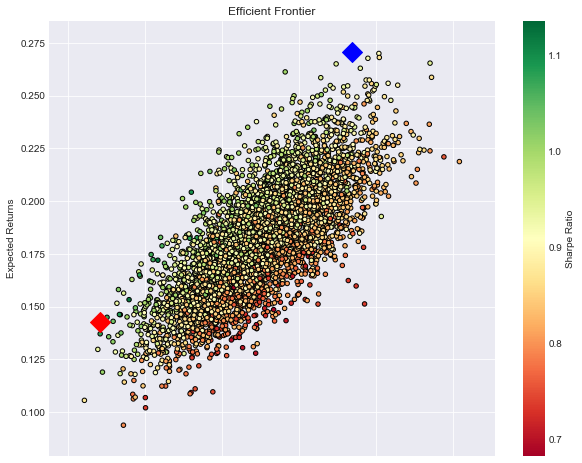

In [9]:
max_returns_vol_expense = df_port['Returns_vol_expense'].max()
max_sharpe = df_port['Sharpe Ratio'].max()

sharpe_port = df_port.loc[df_port['Sharpe Ratio'] == max_sharpe]
max_returns_port = df_port.loc[df_port['Returns_vol_expense'] == max_returns_vol_expense]


# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df_port.plot.scatter(x='Volatility', y='Returns_vol_expense', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_port['Volatility'], y=sharpe_port['Returns_vol_expense'],c='red', marker='D',s=200)
plt.scatter(x=max_returns_port['Volatility'], y=max_returns_port['Returns_vol_expense'],c='blue', marker='D',s=200)
#plt.scatter(x=initial_volatility, y=initial_returns,c='black', marker='D',s=200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


In [10]:
print(max_returns_port.T)
print(sharpe_port.T)

                         1817
Returns_vol_expense  0.270861
Volatility           0.133944
Sharpe Ratio         0.958258
AAXJ Weight          0.003696
ACWX Weight          0.058606
VXUS Weight          0.098833
EUFN Weight          0.032653
VNQI Weight          0.023534
IJT Weight           0.064626
VTWO Weight          0.058214
DVY Weight           0.046707
TLT Weight           0.094856
IBB Weight           0.079388
TQQQ Weight          0.000543
IUSV Weight          0.063197
QTEC Weight          0.001557
QQQ Weight           0.111414
SHV Weight           0.115113
SHY Weight           0.007121
VGSH Weight          0.060123
IEI Weight           0.048278
VGIT Weight          0.031539
                         1366
Returns_vol_expense  0.142581
Volatility           0.068484
Sharpe Ratio         1.136179
AAXJ Weight          0.016765
ACWX Weight          0.056645
VXUS Weight          0.024641
EUFN Weight          0.007484
VNQI Weight          0.037534
IJT Weight           0.055002
VTWO Weigh

## 4. FF3 model

In [12]:
data = pd.read_csv("etfs_day.csv", index_col=0, parse_dates=True)
data = (data - data.iloc[0, :])/data.iloc[0, :]

df = data[symbols]

factors = pd.read_csv("factors_day.csv", index_col=0, parse_dates=True)
factors = factors[['Mkt-RF', 'SMB', 'HML']]
df = pd.merge(data,factors,left_index=True,right_index=True)

df.head()

,AAXJ,ACWI,ACWX,BND,DVY,EMB,EUFN,IBB,IEF,IEI,...,VMBS,VNQI,VONE,VONG,VONV,VTWO,VXUS,Mkt-RF,SMB,HML
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.42,-0.71,0.26
2011-09-01,-0.007301,-0.006868,-0.005504,0.004243,-0.009812,0.001228,-0.017524,-0.015175,0.007969,0.003418,...,-0.001344,-0.004547,-0.011087,-0.006201,-0.008585,-0.014871,-0.006501,-1.33,-1.11,-0.76
2011-09-02,-0.025819,-0.030449,-0.029022,0.007009,-0.030612,0.004660,-0.046919,-0.034924,0.017213,0.004822,...,0.002689,-0.020459,-0.034156,-0.032897,-0.037701,-0.053884,-0.031419,-2.64,-0.86,-0.67
2011-09-06,-0.024038,-0.047390,-0.055792,0.008452,-0.038461,0.000957,-0.112493,-0.020996,0.018575,0.004079,...,0.002689,-0.039678,-0.043991,-0.043059,-0.060657,-0.056333,-0.058938,-0.71,0.39,-0.64
2011-09-07,-0.000356,-0.020376,-0.026770,0.006167,-0.016484,0.004660,-0.082533,0.007691,0.013127,0.003501,...,0.002305,-0.022732,-0.018777,-0.014296,-0.019970,-0.018370,-0.027519,3.06,0.94,0.92


In [13]:
FF3=pd.DataFrame([],index=df.drop(['Mkt-RF','HML','SMB'],axis=1).columns,\
                 columns=['avg','alpha','talpha','betamkt','tbetamkt','betahml','tbetahml','betasmb','tbetasmb']) 

FF3Resid = df.drop(['Mkt-RF','HML','SMB'],axis=1).copy()

FF3['avg'] = df.drop(['Mkt-RF','HML','SMB'],axis=1).mean()

for portfolio in FF3.index:
    y = df[portfolio]
    x = df[['Mkt-RF','HML','SMB']]
    x = sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    FF3.at[portfolio,['alpha','betamkt','betahml','betasmb']]=results.params.values
    FF3.at[portfolio,['talpha','tbetamkt','tbetahml','tbetasmb']]=(results.params/results.HC0_se).values
    FF3Resid[portfolio]=results.resid
    
FF3=FF3.astype('float')  
FF3

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml,betasmb,tbetasmb
AAXJ,0.095573,0.095186,33.772980,0.006907,1.822456,-0.008814,-1.289188,-0.003604,-0.577217
ACWI,0.345029,0.344774,64.894098,0.005071,0.742216,-0.014241,-1.171826,-0.003162,-0.280244
ACWX,0.143028,0.142661,48.869175,0.006517,1.651304,-0.008743,-1.319745,-0.004846,-0.766645
BND,0.068338,0.068396,68.962756,-0.000926,-0.794161,-0.000047,-0.021005,0.000928,0.461773
DVY,0.586861,0.586729,64.975240,0.003234,0.300381,-0.014872,-0.716207,0.002221,0.117040
EMB,0.161111,0.161073,65.890232,0.000654,0.218794,0.000099,0.017222,0.000294,0.055495
EUFN,0.251076,0.250653,45.795037,0.007746,1.073084,-0.016027,-1.370128,-0.009912,-0.876636
IBB,1.467555,1.468490,66.453512,-0.010284,-0.335376,-0.078297,-1.611912,0.009153,0.194604
IEF,0.091183,0.091299,65.323957,-0.001903,-1.143623,0.000506,0.160578,0.001806,0.643008
IEI,0.046868,0.046918,59.400307,-0.000808,-0.855139,0.000065,0.035401,0.000837,0.516175
